# ORIE 4580/5580/5581 Assignment 4

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: https://github.com/rhweigle17/orie4580hw


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [1]:
import numpy as np
np.random.seed(228)
arrival_times = np.random.uniform(0,1000,10000)
arrival_times.sort()
print(arrival_times[:20])

[0.08055372 0.14759435 0.27024066 0.46871192 0.62545646 0.7735488
 0.85971409 0.89838218 1.00916394 1.50689188 1.63569932 1.78289573
 1.98073917 2.18972358 2.29578354 2.41616761 2.416436   2.44210636
 2.47361632 2.68872532]


<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [2]:
waittimes = np.ceil(arrival_times/10)*10 - arrival_times
exp_wait = waittimes.mean()
print('Expected Wait Time (minutes): ' + str(exp_wait))

ci_lower = exp_wait - 1.96 * waittimes.std(ddof=1) / np.sqrt(10000)
ci_upper = exp_wait + 1.96 * waittimes.std(ddof=1) / np.sqrt(10000)

print('95% Confidence Interval for Expected Wait Time: ' + \
      str(round(ci_lower,2)) + "," + str(round(ci_upper,2)))

Expected Wait Time (minutes): 4.9979403092069505
95% Confidence Interval for Expected Wait Time: 4.94,5.05


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [3]:
train_arrivals = []
int_arrival = []
ar = 0
while ar < 1050:
  ia = np.random.exponential(10)
  ar += ia
  int_arrival.append(ia)
  train_arrivals.append(ar)
train_arrivals = np.array(train_arrivals)
int_arrival = np.array(int_arrival)

spot = np.searchsorted(train_arrivals, arrival_times, side='left')
next_train = train_arrivals[spot]
waits = next_train-arrival_times
exp_wait = waits.mean()
print('Expected Wait Time (minutes): ' + str(exp_wait))

ci_lower = exp_wait - 1.96 * waittimes.std(ddof=1) / np.sqrt(10000)
ci_upper = exp_wait + 1.96 * waittimes.std(ddof=1) / np.sqrt(10000)

print('95% Confidence Interval for Expected Wait Time: ' + \
      str(round(ci_lower,2)) + "," + str(round(ci_upper,2)))

Expected Wait Time (minutes): 10.317415859144552
95% Confidence Interval for Expected Wait Time: 10.26,10.37


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [4]:
exp_intarrival = int_arrival.mean()
print('Expected Inter-Arrival Time (minutes): ' + str(np.round(exp_intarrival,2)))
ci_lower = exp_intarrival - 1.96 * int_arrival.std(ddof=1) / np.sqrt(int_arrival.size)
ci_upper = exp_intarrival + 1.96 * int_arrival.std(ddof=1) / np.sqrt(int_arrival.size)

print('95% Confidence Interval for Expected Wait Time: ' + \
      str(round(ci_lower,2)) + "," + str(round(ci_upper,2)))

Expected Inter-Arrival Time (minutes): 9.86
95% Confidence Interval for Expected Wait Time: 7.82,11.9


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [5]:
#part a
#since trains arrive on a 10 minute interval, each passenger's inter-arrival
#time is 10. thus,
print('Expected Inter-Arrival Time (minutes): 10')
print('95% Confidence Interval for Expected Wait Time: [10,10]')

Expected Inter-Arrival Time (minutes): 10
95% Confidence Interval for Expected Wait Time: [10,10]


In [6]:
#part b

index_inter = np.where(spot == 0, 0, spot)
passenger_inter = int_arrival[index_inter]
exp_pass_int = passenger_inter.mean()
print('Expected Passenger-Inter-Arrival (minutes): ' + str(exp_pass_int))

ci_lower = exp_pass_int - 1.96 * passenger_inter.std(ddof=1) / np.sqrt(10000)
ci_upper = exp_pass_int + 1.96 * passenger_inter.std(ddof=1) / np.sqrt(10000)

print('95% Confidence Interval for Expected Passenger-Inter-Arrival: ' + \
      str(round(ci_lower,2)) + "," + str(round(ci_upper,2)))

Expected Passenger-Inter-Arrival (minutes): 20.473721803136474
95% Confidence Interval for Expected Passenger-Inter-Arrival: 20.21,20.74


For (a), train times are deterministic at 10 minutes and as such, the average wait time for any person is 10/2 = 5 minutes

For (b), there are long gaps and short gaps. More people are more likely to arrive at the station during long gaps, which means the expected passenger inter-arrival time is higher than the average inter-arrival time for a train. The average waiting time is thus 20.4 / 2 = ~10.3

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

Integrating over Y from 0 to $e^{-x^2/2}$, X is a standard normal distribution.

Y is then uniformly distributed from 0 to $e^{-X^2/2}$


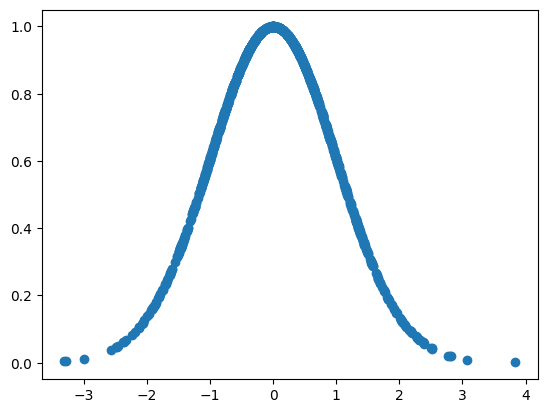

In [7]:
import matplotlib.pyplot as plt

X = np.random.randn(1000)
U = np.random.uniform(1000)
Y = np.exp(-X**2/2)

plt.scatter(X,Y)

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

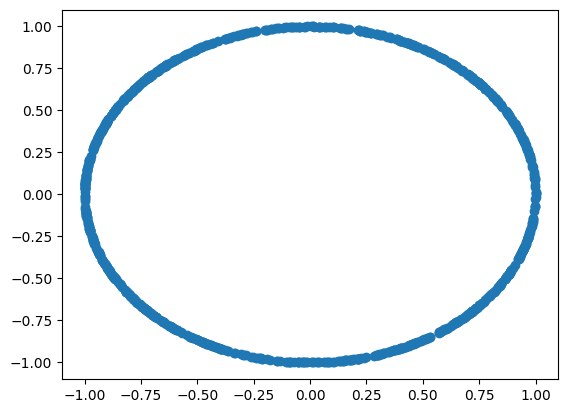

In [8]:
U = np.random.uniform(-1,1,1000)
V = np.random.uniform(-1,1,1000)
X = []
Y = []
for i in range(1000):
  x = U[i] / (np.sqrt(U[i]**2 + V[i]**2))
  X.append(x)
  y = V[i] / (np.sqrt(U[i]**2 + V[i]**2))
  Y.append(y)
X = np.array(X)
Y = np.array(Y)

plt.scatter(X,Y)

(array([ 82.,  89., 138., 110.,  88.,  81., 107., 133.,  94.,  78.]),
 array([-1.56436359e+00, -1.25134606e+00, -9.38328538e-01, -6.25311013e-01,
        -3.12293487e-01,  7.24037870e-04,  3.13741563e-01,  6.26759088e-01,
         9.39776614e-01,  1.25279414e+00,  1.56581166e+00]),
 <BarContainer object of 10 artists>)

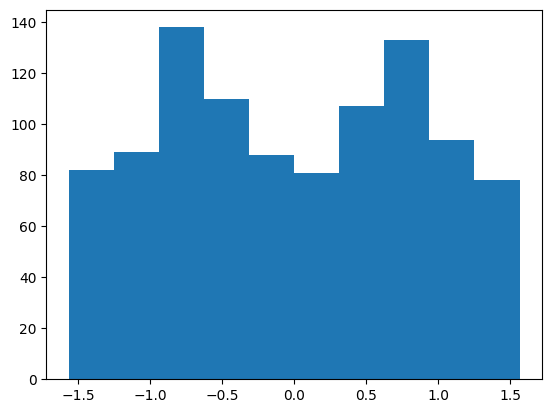

In [9]:
import math

theta = []
for i in range(1000):
  theta.append(math.atan(Y[i]/X[i]))
theta = np.array(theta)

plt.hist(theta)

No, they are not unformly distributed on the circumference.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

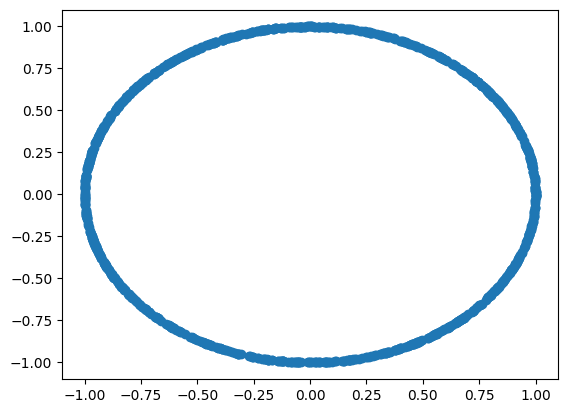

In [10]:
Z = np.random.randn(1000)
W = np.random.randn(1000)

X = []
Y = []
for i in range(1000):
  x = Z[i] / (np.sqrt(Z[i]**2 + W[i]**2))
  X.append(x)
  y = W[i] / (np.sqrt(Z[i]**2 + W[i]**2))
  Y.append(y)
X = np.array(X)
Y = np.array(Y)

plt.scatter(X,Y)

(array([ 98., 107., 101.,  99.,  97., 109., 102., 109.,  85.,  93.]),
 array([-1.57068279e+00, -1.25664849e+00, -9.42614203e-01, -6.28579911e-01,
        -3.14545620e-01, -5.11328172e-04,  3.13522963e-01,  6.27557255e-01,
         9.41591546e-01,  1.25562584e+00,  1.56966013e+00]),
 <BarContainer object of 10 artists>)

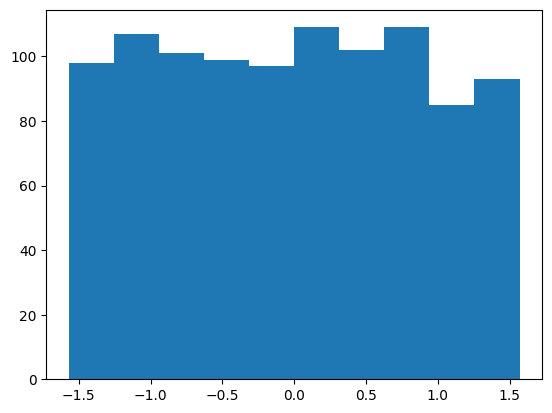

In [11]:
theta = []
for i in range(1000):
  theta.append(math.atan(Y[i]/X[i]))
theta = np.array(theta)

plt.hist(theta)

For the most part, yes, these points are uniformly distributed along the circumference.

Sampling from a square means some angles are more likely than others, but the normal is more even

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.


In [12]:
from scipy.stats import norm

mu = np.array([0.14, 0.07, 0.16])
sigma = np.sqrt([0.0625, 0.01, 0.09])

prob_pos = norm.cdf(mu/sigma)
prob_all_pos = np.prod(prob_pos)
print("Probability All Yeild Positive Return: " + str(round(prob_all_pos,2)))

Probability All Yeild Positive Return: 0.38


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [13]:
from scipy.linalg import cholesky

sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

L = cholesky(sigma, lower=True)
Z = np.random.randn(10000,3)
X = L @ Z.T + mu.reshape(3,1)
count_pos = np.sum(np.all(X > 0, axis=0))
prob_pos = count_pos / 10000
print("Probability All Yeild Positive Return: " + str(round(prob_pos,2)))

Probability All Yeild Positive Return: 0.37


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


Alpha = negative Beta

Variance of a Uniform = $(b-a)^2/12$

$1 = (2b)^2/12$

$12 = (2b)^2$

$\sqrt{12} = 2b$

$b = \sqrt{3}$

Thus, alpha = -$\sqrt{3}$ and beta = $\sqrt{3}$

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


$E[V2] = (1-p)*E[X1] + p*E[X2]$

$= (1-p)*0 + p*0$

= 0

$Var(V2) = E[Var[V2|B]] + Var[E[V2|B]]$

$E[Var[V2|B]] = (1-p)* Var(X1)+ p*Var(x2) = (1-p) + p = 1$

$Var[E[V2|B]] = Var(0) = 0$

$Var(V2) = 1 + 0 = 1$

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


$Cov[V1,V2] = E[V1 * V2] - E[V1]E[V2]$

$= E[V1 * V2]$ (E[V1] and E[V2] are 0)

$V1*V2 = X1*((1-B)X1 + BX2) = (1-B)X^2+BX1X2$

$E[V1*V2] = E[(1-B)X^2] + E[BX1X2]$

$= (1-p)E[X1^2] + p* E[X1X2] = (1-p)*(Var[X1]*E[X1]^2) = (1-p)$

$Cov(V1,V2) = 1-p$

$p = 1-\sigma_{12}$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

Text(0, 0.5, 'V2')

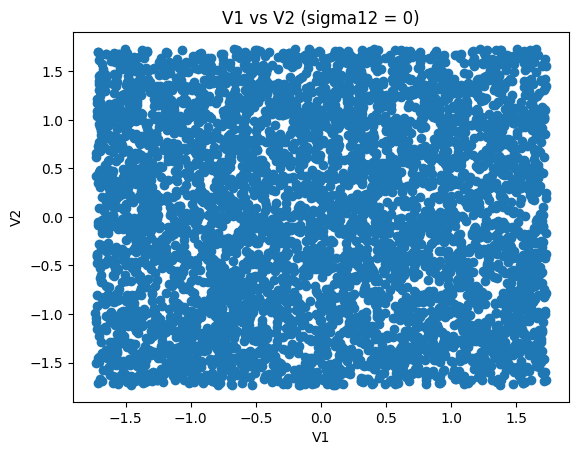

In [14]:
def generate_uncorrelated_uniform(n,sigma12):
  X1 = np.random.uniform(-np.sqrt(3),np.sqrt(3),n)
  X2 = np.random.uniform(-np.sqrt(3),np.sqrt(3),n)

  p = 1 - sigma12
  B = np.random.binomial(1,p,n)

  V1 = X1
  V2 = (1-B)*X1 + B*X2

  return V1,V2

V1,V2 = generate_uncorrelated_uniform(5000,0)
plt.scatter(V1,V2)
plt.title("V1 vs V2 (sigma12 = 0)")
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

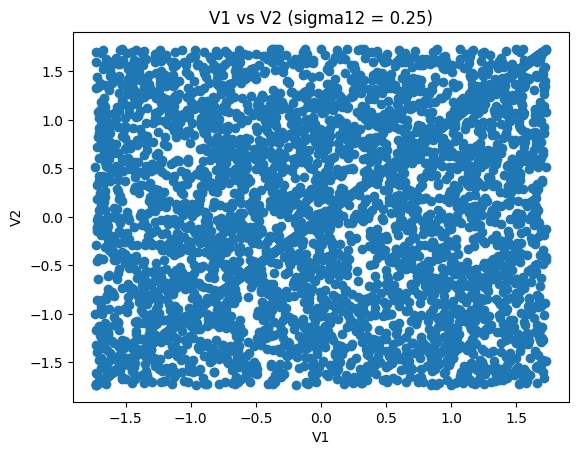

In [15]:
V1,V2 = generate_uncorrelated_uniform(5000,0.25)
plt.scatter(V1,V2)
plt.title("V1 vs V2 (sigma12 = 0.25)")
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

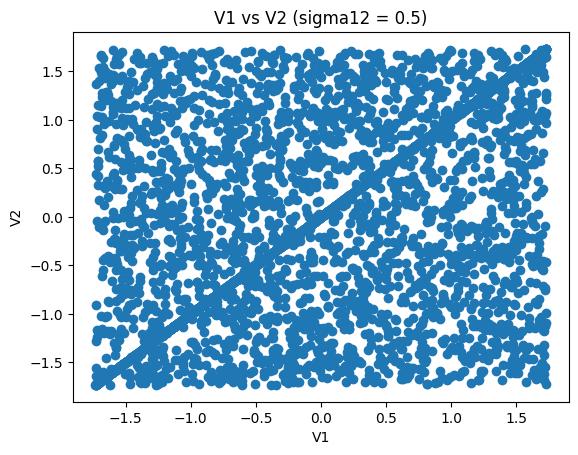

In [16]:
V1,V2 = generate_uncorrelated_uniform(5000,0.5)
plt.scatter(V1,V2)
plt.title("V1 vs V2 (sigma12 = 0.5)")
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

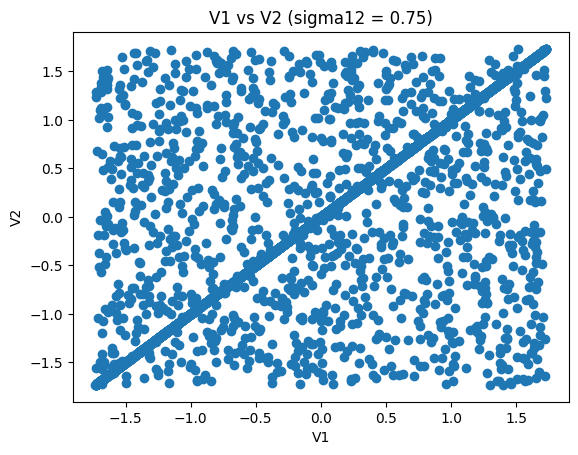

In [17]:
V1,V2 = generate_uncorrelated_uniform(5000,0.75)
plt.scatter(V1,V2)
plt.title("V1 vs V2 (sigma12 = 0.75)")
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

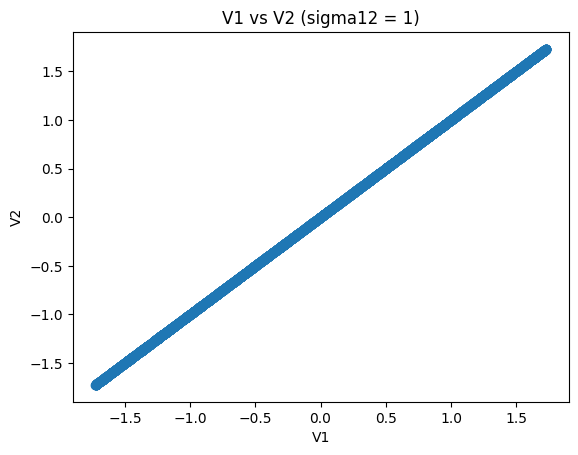

In [18]:
V1,V2 = generate_uncorrelated_uniform(5000,1)
plt.scatter(V1,V2)
plt.title("V1 vs V2 (sigma12 = 1)")
plt.xlabel('V1')
plt.ylabel('V2')

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [19]:
V1, V2 = generate_uncorrelated_uniform(5000,0.5)
prob = np.mean((V1 <=0)&(V2<=0))
print("Joint Probability: " + str(round(prob,2)))

Joint Probability: 0.38


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


We start with Z1 and Z2 as multivariate normals, then use the normal cdf to turn them into uniform(0,1) random variables. Then we rescale each to [alpha, beta] and and each W is uniform[alpha, beta].

Text(0, 0.5, 'W2')

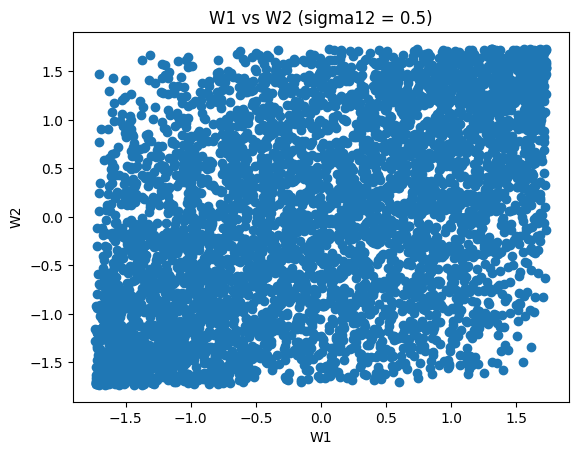

In [20]:
def generate_copula(n):
  sigma = np.array([[1,0.5],[0.5,1]])
  L = cholesky(sigma, lower=True)
  Z = np.random.randn(n,2) @ L.T
  U = norm.cdf(Z)
  W = -(3**(1/2)) + ((3**(1/2))+(3**(1/2)))*U
  W1,W2 = W[:,0], W[:,1]
  return W1,W2

w1,w2 = generate_copula(5000)
plt.scatter(w1,w2)
plt.title("W1 vs W2 (sigma12 = 0.5)")
plt.xlabel('W1')
plt.ylabel('W2')


In [21]:
prob = np.mean((w1 >=0)&(w2>=0))
print("Joint Probability: " + str(round(prob,2)))

Joint Probability: 0.33
